In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score,log_loss
from tqdm import notebook
%matplotlib inline

In [34]:
def init_couche(n0,n1):#n0 : nombre d'entree , n1 : nombre de perceptron
    W= np.random.randn(n1,n0)
    b=np.random.randn(n1,1)
    return W,b

In [35]:
def init_reseau(couches):
    #prend comme argument une liste de longueur le nombre de couche, 
    # chaque element est le nombre de percetron de la couche numero l'index de l'element, couche[0] nombre d'entree
    parametres={}
    for i in range(1,len(couches)):
        W,b=init_couche(couches[i-1],couches[i])
        parametres[f'W{i}']=W
        parametres[f'b{i}']=b
    return parametres



In [36]:
def activation_couche(X,W,b): ##### fonction d'activation, la fonction prise dans cet exemple est sigmoid
    Z=W.dot(X)+b
    A=1/(1+np.exp(-Z))
    return A

In [37]:
def forward_propagation(X,parametres):
    nbre_couche=len(parametres)//2
    activations={'A0':X}
    for i in range(1,nbre_couche+1):
        activations[f'A{i}']=activation_couche(activations[f'A{i-1}'],
                                               parametres[f'W{i}'],parametres[f'b{i}'])
    return activations

In [38]:
def back_propagation(y,activations,parametres): #calcul des gradients de la fonction cout , la fonction utilisee c'est LOG LOSS
    nbre_images=y.shape[1]
    nbre_couche=len(parametres)//2

    dZ=activations[f'A{nbre_couche}']-y
    gradients={}

    for i in range(nbre_couche,0,-1):
        gradients[f'dW{i}']=1/nbre_images*dZ.dot(np.transpose(activations[f'A{i-1}']))
        gradients[f'db{i}']=1/nbre_couche*np.sum(dZ,axis=1,keepdims=True)
        dZ=np.dot(parametres[f'W{i}'].T,dZ) * activations[f'A{i-1}'] *(1-activations[f'A{i-1}'])
    
    return gradients

In [39]:
def update(gradients,parametres,learning_rate): #mettre a jour les poids des perceptrons
    nbre_couche=len(parametres)//2
    for i in range(1,nbre_couche+1):
        parametres[f'W{i}']=parametres[f'W{i}']-learning_rate*gradients[f'dW{i}']
        parametres[f'b{i}']=parametres[f'b{i}']-learning_rate*gradients[f'db{i}']
    return parametres

In [40]:
def prediction(X,parametres): # cette fonction sert apres l'apprentissage, elle retourne la valeur d'activation calculee grace a la forward propagation du percetron de la derniere couche
    return forward_propagation(X,parametres)[f'A{len(parametres)//2}']>=0.5

In [41]:
def reseau_neurones(X,y,couches_cachee,learning_rate,iteration):### la fonction main qui creer un reseaux de neurone et fait son apprentissage selon la data et les parametre donnes 

    # X , y : Data
    # couche_cachee: nombre de couches du reseaux - 2

    couches=[X.shape[0]]+couches_cachee+[y.shape[0]]
    parametres=init_reseau(couches)

    erreur_apprentissage=[]
    precision_apprentissage=[]
    
    for i in notebook.tqdm(range(iteration)):
        activations=forward_propagation(X,parametres)
        gradients=back_propagation(y,activations,parametres)
        parametres=update(gradients,parametres,learning_rate)

        if i % 10 == 0:
            erreur_actuelle=log_loss(y.flatten(),activations[f'A{len(parametres)//2}'].flatten())
            erreur_apprentissage.append(erreur_actuelle)
            y_pred=prediction(X,parametres)
            precision_actuelle=accuracy_score(y.flatten(),y_pred.flatten())
            precision_apprentissage.append(precision_actuelle)

    return parametres,erreur_apprentissage,precision_apprentissage

dim X: (2, 100)
dim y: (1, 100)


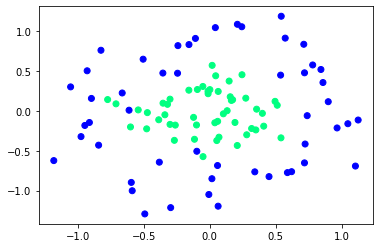

In [85]:
####################################################################################
########## EXEMPLE DE DATA AVEC UNE DISTRIUTION COMPLEXE A CLASSIFIER ##############

#la distribtuion choisie dans cet exemple est circulaire

X,y=make_circles(n_samples=100,noise=0.2,factor=0.3,random_state=2)
X=X.T
y=y.reshape((1,y.shape[0]))
print(f'dim X: {X.shape}\ndim y: {y.shape}')
plt.scatter(X[0,:],X[1,:],c=y,cmap='winter') #### le vert correspond a y = 1 et bleu 0
plt.show()

In [43]:
##### initialisation d'un reseaux de neurone et avec 2 hidden layers de 3 perceptron chacunes puis verfication des dimensions des couches#####
couches=[X.shape[0]]+[3,3]+[y.shape[0]]
parametres=init_reseau(couches)

for key,val in parametres.items():
    print(key,val.shape)

W1 (3, 2)
b1 (3, 1)
W2 (3, 3)
b2 (3, 1)
W3 (1, 3)
b3 (1, 1)


In [44]:
activations=forward_propagation(X,parametres)
for key,val in activations.items():
    print(key,val.shape)

A0 (2, 100)
A1 (3, 100)
A2 (3, 100)
A3 (1, 100)


In [45]:
gradients=back_propagation(y,activations,parametres)
for key,val in gradients.items():
    print(key,val.shape)

dW3 (1, 3)
db3 (1, 1)
dW2 (3, 3)
db2 (3, 1)
dW1 (3, 2)
db1 (3, 1)


In [52]:
'''tester le modele avec 2 couches de 16 perceptrons chacune et un taux d'aprentissage de 0.01 avec 100 000 iterations '''
parametres=reseau_neurones(X,y,[16,16],learning_rate=0.01,iteration=100000)

  0%|          | 0/100000 [00:00<?, ?it/s]

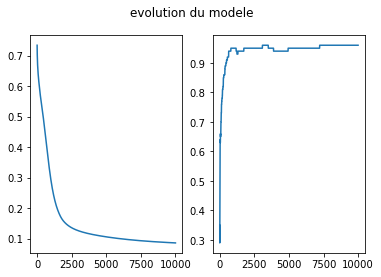

In [91]:
poids, erreur , precision = parametres
fig, (ax_erreur, ax_precision) = plt.subplots(1, 2)
fig.suptitle("evolution du modele")
ax_erreur.plot(erreur)
ax_precision.plot(precision)

array([[ True]])

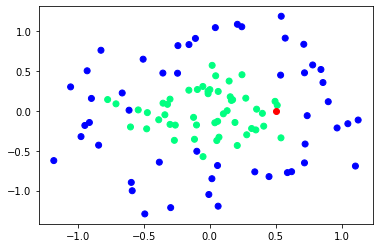

In [92]:
#### test ####
element = np.array([[0.5,0]]).T
plt.scatter(X[0,:],X[1,:],c=y,cmap='winter') #### le vert correspond a y = 1 et bleu 0
plt.plot(element[0,:],element[1,:],'ro')
prediction(element,poids)